In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from torch.utils.data import ConcatDataset

import itertools

from src.data_generator.heat_equations import HeatEquationDataset
from src.data_generator.diffusion_equations import DiffusionEquationDataset
from src.data_generator.wave_equations import WaveEquationDataset

from src.train.multi_physics_train import train
from src.figures.figures import plot_sample
from src.models.multi_physics import Encoder, MultiMeasurementHeads, MultiPropertyHeads, SharedDecoder
from src.loss_function.loss_function import Loss



# Create Dataset
wave_dataset = WaveEquationDataset(n_samples=2, nx=50, nt=50)
diffusion_dataset = DiffusionEquationDataset(n_samples=2, nx=50, nt=50)
heat_dataset = HeatEquationDataset(n_samples=2, nx=50, nt=50)
dataset = ConcatDataset([wave_dataset, diffusion_dataset, heat_dataset])

# Define PINNS
embedding_dim = 2
encoder = Encoder(latent_dim=embedding_dim)
decoder = {
    "measurements": MultiMeasurementHeads(spacetime_dim=2),
    "properties": MultiPropertyHeads(latent_dim=embedding_dim)
}

# training
encoder.train()
for decoder_net in decoder.values():
    decoder_net.train()

lr = 1e-3
all_params = list(encoder.parameters()) + list(itertools.chain.from_iterable(
decoder_net.parameters() for decoder_net in decoder.values()
))
optimizer = torch.optim.Adam(all_params, lr=lr)

loss = Loss()
train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    encoder=encoder,
    decoder=decoder,
    epochs=2000
)

# plot
encoder.eval()
for decoder_net in decoder.values():
    decoder_net.eval()



Epoch 0: Loss = 3.4459e+02
Epoch 20: Loss = 1.8156e+02
Epoch 40: Loss = 1.5818e+02
Epoch 60: Loss = 1.4223e+02
Epoch 80: Loss = 1.2729e+02
Epoch 100: Loss = 1.1109e+02
Epoch 120: Loss = 9.4097e+01
Epoch 140: Loss = 7.7433e+01
Epoch 160: Loss = 6.1594e+01
Epoch 180: Loss = 4.7161e+01
Epoch 200: Loss = 3.5317e+01
Epoch 220: Loss = 2.6558e+01
Epoch 240: Loss = 1.9930e+01
Epoch 260: Loss = 1.5095e+01
Epoch 280: Loss = 1.1827e+01
Epoch 300: Loss = 9.4437e+00
Epoch 320: Loss = 7.9377e+00
Epoch 340: Loss = 6.8175e+00
Epoch 360: Loss = 6.1312e+00
Epoch 380: Loss = 5.5270e+00
Epoch 400: Loss = 5.1793e+00
Epoch 420: Loss = 4.8697e+00
Epoch 440: Loss = 4.6448e+00
Epoch 460: Loss = 4.4384e+00
Epoch 480: Loss = 4.3030e+00
Epoch 500: Loss = 4.1799e+00
Epoch 520: Loss = 4.0814e+00
Epoch 540: Loss = 4.0001e+00
Epoch 560: Loss = 3.9308e+00
Epoch 580: Loss = 3.8783e+00
Epoch 600: Loss = 3.8370e+00
Epoch 620: Loss = 3.7894e+00
Epoch 640: Loss = 3.7391e+00
Epoch 660: Loss = 3.7017e+00
Epoch 680: Loss = 3.

6


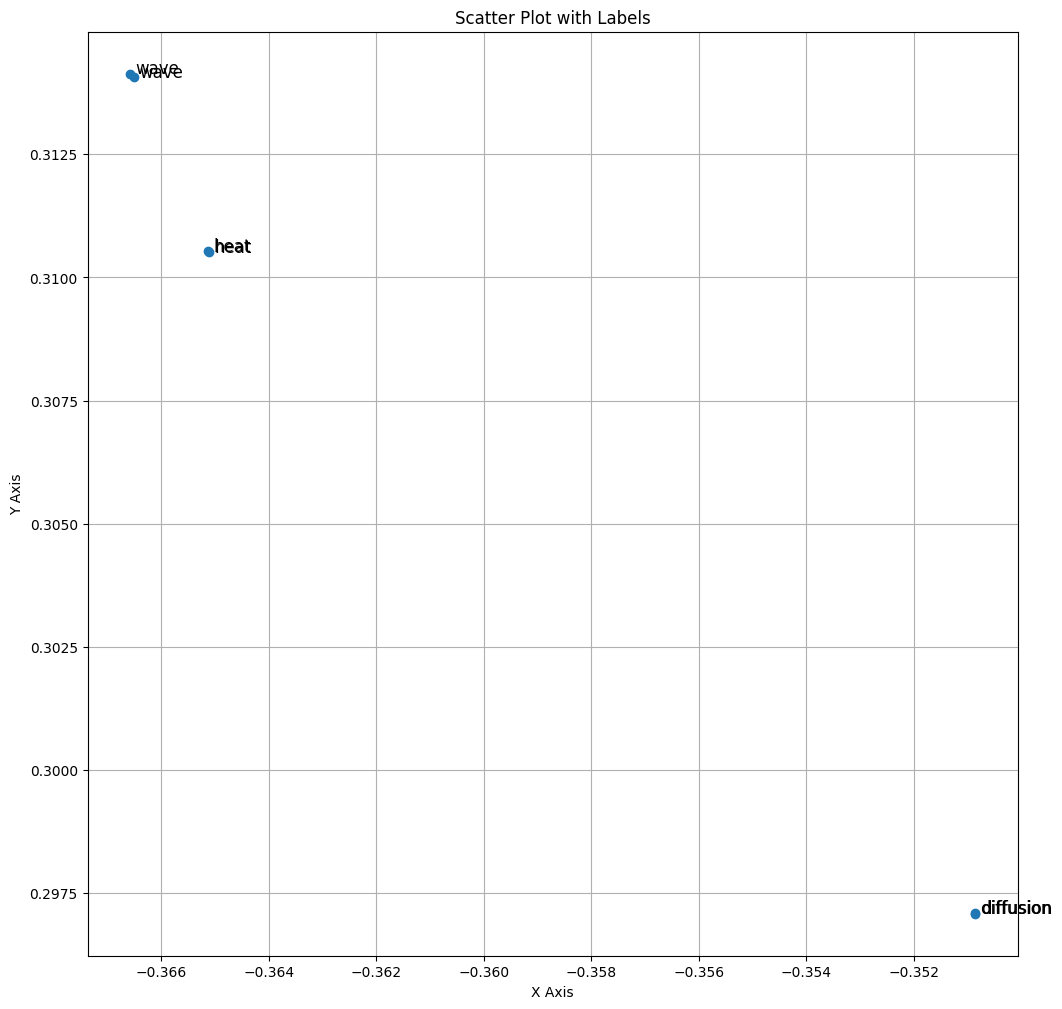

In [8]:
import matplotlib.pyplot as plt
print(len(dataset))
embeddings = [encoder(item["encoder_input"])[0].detach().numpy() for item in dataset]
# Separate x and y coordinates
x = [x[0] for x in embeddings]
y = [x[1] for x in embeddings]
labels = [item["u_type_txt"] for item in dataset]

# Create scatter plot
plt.figure(figsize=(12,12))
plt.scatter(x, y)

# Add labels
for i in range(len(x)):
    plt.text(x[i] + 1e-4, y[i], labels[i], fontsize=12)

plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Scatter Plot with Labels")
plt.grid(True)
plt.show()
